                                                                                    Name : Emmanuel Vargas-Zapata

# Stage I: Data Exploration  

### 1. Download the training data and test data from https://www.kaggle.com/c/titanic/data as .csv files

### 2. Load the two datasets as pandas DataFrames. Combine them into a single DataFrame. For the purpose of this stage, we will only use the combined dataset.

In [1]:
#import pandas
import pandas as pd
import os

In [2]:
#search the directory for the csv files
currentPath = os.getcwd()
dataPath = currentPath + '/Data'
os.listdir(dataPath)

['test.csv', 'train.csv']

In [3]:
#load the two data sets as pandas Data Frames
os.chdir(dataPath)
trainDataFrame = pd.read_csv('train.csv')
testDataFrame = pd.read_csv('test.csv')

In [4]:
#combine the 2 datasets. concatinate is used because both files have different passengers
combinedDataFrame = pd.concat([trainDataFrame, testDataFrame], sort=True)
combinedDataFrame.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### 3. Obtain basic information of variables. For each variable, find out:
##### 1) What does this variable represent
##### 2) The meaning of values
##### 3) Numerical summary
##### 4) Graphical distributions of values


#### Passenger
##### This variable represents the passengers number. These numbers are assigned randomly and are only assigned for identification purposes. Each passenger has a number each from 1 to 1309.

#### Pclass
##### This variable represents ticket class. Each passenger was seperated into 3 groups that demonstrated their socio-economic class. 1 stands for upper class, 2 stands for middle class, and 3 stands for lower class.

#### Name
##### This variable represents the passengers name. This goes by last name, title and first name.

#### Sex
##### This variable represents the passengers sex. It is either male or female.

#### Age
##### This variable represents the passengers age in years. The age is fractional if the passenger is less than 1 and if the age is estimated, it is in the form of xx.5.

#### SibSp
##### This variable represents the passengers number of siblings, step-siblings, and/or spouses abroad the titanic.

#### Parch
##### This variable represents the passengers number of parents, children, and or step-children abroad the titanic.

#### Ticket
##### This variable represents the passengers tickets.

#### Fare
##### This variable represents the passengers fare.

#### Cabin
##### This variable represents the passengers cabin number.

#### Embarked
##### This variable represents the passengers port of embarkation. C stands for Cherbourg, Q stands for Queenstown, S stands for Southampton.

### 4. Data Cleansing
#### Are there missing values in each column? If so, is it possible to impute the missing data in a reasonable way? Discard all passengers with incomplete information may significantly reduce the number of data example. We should use different methods to handle the missing data according to the nature of the variable:
#### 1) If a variable only has a tiny fraction of values, a common practice is imputing with mean or median value among passengers belonging to the same group.
#### 2) If most values for a variable are missing, it is usually better to simply discard this feature.
#### Please go through all variables and handle the missing values.


In [5]:
#i will find how many missing variables there are by subtracting the length of the dataframe from the count of each column
countNaN = len(combinedDataFrame) - combinedDataFrame.count()
print("missing value count")
print(countNaN)

missing value count
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


In [6]:
#the cabin variable has too many missing values
#therefore, i will discard the cabin column from the data frame
combinedDataFrame = combinedDataFrame.drop(columns=['Cabin'])
combinedDataFrame.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [7]:
#the embarked and fare variable has only 1 -2 missing values.
#therefore, i will discard the passengers with missing embarked and/or fare values from the data frame
combinedDataFrame = combinedDataFrame[pd.notnull(combinedDataFrame['Embarked'])]
combinedDataFrame = combinedDataFrame[pd.notnull(combinedDataFrame['Fare'])]

#print missing values again
countNaN = len(combinedDataFrame) - combinedDataFrame.count()
print("missing value count")
print(countNaN)

missing value count
Age            263
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       417
Ticket           0
dtype: int64


In [8]:
#i will fill in the missing age data based on the sex of the passengers by splitting both genders and finding the average...
# age of both
#first, i will create a new dataframe that only has male passengers known as 'maleDataFrame'
maleDataFrame = combinedDataFrame[combinedDataFrame['Sex'].str.match('male')]

#i will use .describe to find the average age of male passengers
maleDataFrame.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,657.000000,842.000000,842.000000,842.000000,842.000000,842.000000,577.000000
mean,30.539696,26.154601,0.248219,658.308789,2.371734,0.414489,0.188908
std,14.243582,42.486877,0.709308,375.192919,0.812102,0.998419,0.391775
min,0.330000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.876050,0.000000,339.250000,2.000000,0.000000,0.000000
50%,28.000000,11.887500,0.000000,664.500000,3.000000,0.000000,0.000000
75%,39.000000,26.550000,0.000000,980.000000,3.000000,1.000000,0.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [9]:
#next, i will fill the missing age data for females. first is the female data frame
femaleDataFrame = combinedDataFrame[combinedDataFrame['Sex'].str.match('female')]

#i will use .describe to find the average age of female passengers
femaleDataFrame.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,386.000000,464.000000,464.000000,464.00000,464.000000,464.000000,312.000000
mean,28.576658,46.052399,0.635776,649.05819,2.159483,0.655172,0.740385
std,14.507643,63.390067,1.051016,383.13692,0.864713,1.102547,0.439128
min,0.170000,6.750000,0.000000,2.00000,1.000000,0.000000,0.000000
25%,19.000000,10.500000,0.000000,318.50000,1.000000,0.000000,0.000000
50%,27.000000,23.000000,0.000000,635.50000,2.000000,0.000000,1.000000
75%,37.750000,55.000000,1.000000,982.50000,3.000000,1.000000,1.000000
max,76.000000,512.329200,9.000000,1306.00000,3.000000,8.000000,1.000000


In [10]:
#according to both data frames, the mean age of males was 31 and female was 29. i will fill in the missing data with... 
# this data
maleDataFrame[['Age']] = maleDataFrame[['Age']].fillna(value=31)
femaleDataFrame[['Age']] = femaleDataFrame[['Age']].fillna(value=29)

#next, i will concatinate both dataframes into a new data frame...
#first, place both data frames into one variable
dataFrames = [maleDataFrame, femaleDataFrame]

#concatinate
newDataFrame = pd.concat(dataFrames, ignore_index=True)

#test for any other missing data in the newDataFrame
countNaN = len(newDataFrame) - newDataFrame.count()
print("missing data count")
print(countNaN)

missing data count
Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       417
Ticket           0
dtype: int64


C:\Users\16463\Anaconda3W\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
#since the survived variable only consists of 1's and 0's, i will just propagate the previous value forward ...
#because there only lies 2 outcomes unlike age where it goes from 0 to 80
newDataFrame = newDataFrame.fillna(method='ffill')

#check for missing data
countNaN = len(newDataFrame) - newDataFrame.count()
print("missing data count")
print(countNaN)

#according to the count, there is no more missing data

missing data count
Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64


### 5. (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr. Mme, or Master., which indicates their social status. Please create a column to indicate whether a passenger has a rare title.

In [12]:
#first i will import numpy to use .where function to find rare titles in the data frame
import numpy as np

#i will then create a set that will find the rare titles under the name variable 
rareTitles = [', Master', ', Dr.', ' Mme,']

#i will now search the data frame under Name for the RareTitles set and update a new column called RareTitle
#either true = 1 or false = 0
newDataFrame['RareTitle'] = np.where(newDataFrame['Name'].str.contains('|'.join(rareTitles)), '1', '0')

#to check how many passengers used titles Dr. Mme, or Master,, i will use value_counts under the RareTitle column
newDataFrame['RareTitle'].value_counts()

0    1237
1      69
Name: RareTitle, dtype: int64

# Stage II: Model Construction

## 1. Data preparation

### 1) Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.

In [13]:
#i will replace the male value with 1 and female value with 0
newDataFrame.Sex = newDataFrame.Sex.replace({"male": "1",
                                             "female": "0"})

#find how many male and female passengers there are and what values are being used
newDataFrame['Sex'].value_counts()

1    842
0    464
Name: Sex, dtype: int64

### 2) Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embark_S, Embark_C, and Embark_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embark_S should be set to 1, and Embark_C and Embark_Q should be zero. (pandas.get_dummies() can help you with this)

In [14]:
#i will use pandas.get_dummies() to seperate each value in the embarked variable into 1s and 0s and into their own variable
newDataFrame = pd.concat([newDataFrame, pd.get_dummies(newDataFrame['Embarked'])], axis=1)

#drop the Embarked column
newDataFrame = newDataFrame.drop(columns=['Embarked'])
newDataFrame.head()

,Age,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,RareTitle,C,Q,S
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,0,0,1
1,35.0,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,0,0,1
2,31.0,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877,0,0,1,0
3,54.0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,0,0,0,1
4,2.0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,1,0,0,1


### 3) Feature Scaling: Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).

In [15]:
#import sklearn preprocessing function
from sklearn import preprocessing

#since ive had problem convering my name column to a float in order to use StandardScaler, i used an encoder to transform 
#the column into an int
labelEncoder = preprocessing.LabelEncoder()
encodedDataFrame = newDataFrame

#for loop to check each column and if its an object, transform it into a int
for column_name in encodedDataFrame.columns:
    if encodedDataFrame[column_name].dtype == object:
        encodedDataFrame[column_name] = labelEncoder.fit_transform(encodedDataFrame[column_name])
    else:
        pass
    
#add the function into a variable and test the scaler.
scaler = preprocessing.StandardScaler()
print(scaler.fit(newDataFrame))
    
#apply the scaler to each column to make everything numerical
scaledDataFrame = scaler.fit_transform(encodedDataFrame)
scaledDataFrame = pd.DataFrame(scaledDataFrame, columns=['Age', 'Fare', 'Name', 
                                                         'Parch', 'PassengerId','Pclass',
                                                         'Sex','SibSp','Survived',
                                                         'Ticket', 'RareTitle', ''
                                                         'Embark_C','Embark_Q','Embark_S'])

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\16463\Anaconda3W\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\16463\Anaconda3W\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\16463\Anaconda3W\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 4) Because the test dataset has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. Split the dataset into training set, validation set, and test set. (sklearn.model_selection.train_test_split() can help you with this)

In [16]:
#import train test split method
from sklearn.model_selection import train_test_split

#i will split the dataframe into 2. one with 80% of data and other with 20%
train, validation = train_test_split(scaledDataFrame, test_size=0.2)

#test this 
print("size of train data frame = ", train.shape)
print("size of validation data frame = ", validation.shape)

#according to the tests, both dataframes are split from 80% and 20%
train.head()

size of train data frame =  (1044, 14)
size of validation data frame =  (262, 14)


,Age,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,RareTitle,Embark_C,Embark_Q,Embark_S
101,0.083112,-0.474653,1.224584,-0.445612,-1.313030,0.840997,0.742340,-0.479763,-0.593268,-0.428593,-0.236178,-0.510507,-0.322448,0.656086
417,1.562737,1.940744,-0.635638,-0.445612,0.015824,-1.549301,0.742340,1.439290,1.685579,1.306054,4.234092,-0.510507,-0.322448,0.656086
506,-0.384138,-0.505814,-1.677362,-0.445612,0.344067,0.840997,0.742340,-0.479763,-0.593268,1.500796,-0.236178,-0.510507,-0.322448,0.656086
1059,0.706112,1.500775,1.378717,0.709088,-0.193299,-1.549301,-1.347091,0.479763,1.685579,-1.286901,-0.236178,1.958836,-0.322448,-1.524190
683,-0.539888,-0.373437,-0.779140,-0.445612,1.082613,0.840997,0.742340,0.479763,-0.593268,-0.053534,-0.236178,-0.510507,-0.322448,0.656086


### 5) (Optional: Feature Engineering) Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

In [17]:
#find how many passengers boarded for free by finding which rows have their fare equal to 0
print("# of passengers that boarded for free: ", newDataFrame[newDataFrame.Fare == 0].shape)

#transfer the fare column to a new column called PaidTicket
newDataFrame['PaidTicket'] = newDataFrame['Fare']

#convert each value in PaidTicket to 1s and 0s. if PaidTicket = 0, then return 0 because they rode for free
newDataFrame.loc[newDataFrame.PaidTicket != 0, 'PaidTicket'] = 1
newDataFrame.loc[newDataFrame.PaidTicket == 0, 'PaidTicket'] = 0

#check to see if Fare and PaidTicket matches
print("# of passengers that boarded for free: ", newDataFrame[newDataFrame.PaidTicket == 0].shape)

# of passengers that boarded for free:  (17, 14)
# of passengers that boarded for free:  (17, 15)


In [18]:
#what we have so far
train.head()

,Age,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,RareTitle,Embark_C,Embark_Q,Embark_S
101,0.083112,-0.474653,1.224584,-0.445612,-1.313030,0.840997,0.742340,-0.479763,-0.593268,-0.428593,-0.236178,-0.510507,-0.322448,0.656086
417,1.562737,1.940744,-0.635638,-0.445612,0.015824,-1.549301,0.742340,1.439290,1.685579,1.306054,4.234092,-0.510507,-0.322448,0.656086
506,-0.384138,-0.505814,-1.677362,-0.445612,0.344067,0.840997,0.742340,-0.479763,-0.593268,1.500796,-0.236178,-0.510507,-0.322448,0.656086
1059,0.706112,1.500775,1.378717,0.709088,-0.193299,-1.549301,-1.347091,0.479763,1.685579,-1.286901,-0.236178,1.958836,-0.322448,-1.524190
683,-0.539888,-0.373437,-0.779140,-0.445612,1.082613,0.840997,0.742340,0.479763,-0.593268,-0.053534,-0.236178,-0.510507,-0.322448,0.656086


## 2. Building models
### So far, we have learned four models: linear regression, polynomial regression, logistic regression, and k-nearest neighbors method. Choose models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model (in next stage we will fine-tune the models in a systematic manner).


In [19]:
#linear regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

#use linear regression to see the relationship between fare costs and class
model1.fit(train[['Fare']], train['Survived'])

#slope
m = model1.coef_[0]

#intercept
b = model1.intercept_

#find the range between these variables
print("range of Fare:", train['Fare'].max(), train['Fare'].min())
print("range of class:", train['Survived'].max(), train['Survived'].min())

range of Fare: 9.2587587279697 -0.6420564149620818
range of class: 1.685578971922774 -0.5932679611322393


In [20]:
#import tools to plot on graph
import matplotlib.pyplot as plt
%matplotlib inline

#creating the graph and the line
def plotRegression(train, m, b):
    
    #100 sample points between -2 and 2 (the range)
    x_samples = np.linspace(-1, 10, 100)
    # use y = mx + b to get the y values
    y_samples = x_samples * m + b
    
    # plot the line
    plt.plot(x_samples, y_samples, 'b-', label="Regression Line")
    
    # plot the training data
    plt.plot(train['Fare'], train['Survived'], 'g.', label="Training Data")

    plt.xlabel("Fare")
    plt.ylabel("Survived")
    plt.title("Fare vs. Survived")
    plt.legend(loc='upper right')
    plt.show()

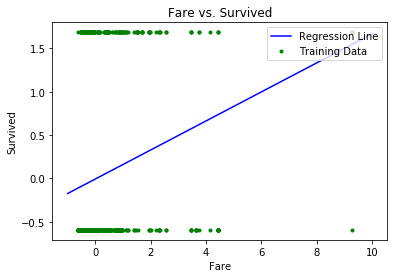

In [21]:
plotRegression(train, m, b)
#according to the graph, the passengers that paid more had a better chance to survive

### 3. Evaluate the models
#### For each model you have trained, perform the following evaluations:
#### 1) cross validation (show precisions)
#### 2) confusion matrix, precision, and recall
#### 3) precision and recall tradeoff
#### 4) ROC curve and show AUC (area under curve)


In [22]:
#cross validation of the linear regression model
from sklearn.model_selection import cross_val_score
model1.fit(train.iloc[:, :4], train.iloc[:, 10])
print(cross_val_score(model1, train.iloc[:, :10], train.iloc[:, 10], cv=3))

[0.272663   0.30005084 0.01419938]


In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Survived'], train['Fare'])
print(matrix)

ValueError: continuous is not supported